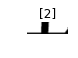

In [7]:
from detect_zip import *
import matplotlib.pyplot as plt

from sklearn.externals import joblib

# 学習済手書き数字データ読み込み
clf = joblib.load('digits.pkl')

# 画像から領域を読み込む
cnts, img = detect_zipno("postcard.jpg")

# 読み込んだデータプロット
# enumerate(リスト(,インデックス)任意の位置から順に要素を取り出す
for i,pt  in enumerate(cnts):
    x,y,w,h = pt
    # 枠線の輪郭部分だけ小さくする
    x += 8
    y += 8
    w -= 16
    h -= 16
    # 画像データ取り出し
    im2 = img[y:y + h, x:x + w]
    # データを学習済みデータに合わせる
    im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    # リサイズ
    im2gray = cv2.resize(im2gray, (8,8))
    # 白黒反転
    # 黒0~ 白255
    # 判定する文字は薄い白字のようす
    im2gray = 15 - im2gray // 16
    im2gray = im2gray.reshape((-1, 64))
    # データ予測
    res = clf.predict(im2gray)
    # 画面に出力
    plt.subplot(1,7,i + 1)
    plt.imshow(im2)
    plt.axis("off")
    plt.title(res)

plt.show()